<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/%D0%9A%D1%80%D0%B0%D1%81%D1%8C%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00


In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import linearmodels
from linearmodels import PanelOLS
from linearmodels import RandomEffects

In [54]:
df = pd.read_csv('/content/Korea Income and Welfare.csv')
df.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [55]:
df = df.drop(columns = ['family_member','education_level','marriage','religion','occupation','company_size','reason_none_worker'])
#Тут мы удалили все столбцы, которые нам не давали никакой нужной инфы
df

,id,year,wave,region,income,gender,year_born
0,10101,2005,1,1,614.0,2,1936
1,10101,2011,7,1,896.0,2,1936
2,10101,2012,8,1,1310.0,2,1936
3,10101,2013,9,1,2208.0,2,1936
4,10101,2014,10,1,864.0,2,1936
...,...,...,...,...,...,...,...
83,80101,2013,9,1,764.0,2,1940
84,80101,2014,10,2,1369.0,2,1940
85,80101,2015,11,2,1010.0,2,1940
86,80101,2016,12,2,1011.0,2,1940


In [56]:
from linearmodels.datasets import jobtraining
data = jobtraining.load()
year = pd.Categorical(data.year)
data = data.set_index(['year','fcode'])
data['year'] = year

In [57]:
exog_vars = ['grant', 'employ']
exog = sm.add_constant(data[exog_vars])
mod = RandomEffects(data.clscrap, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                clscrap   R-squared:                        0.0205
Estimator:              RandomEffects   R-squared (Between):             -0.5933
No. Observations:                 105   R-squared (Within):               0.0250
Date:                Wed, Oct 16 2024   R-squared (Overall):              0.0205
Time:                        23:58:28   Log-likelihood                   -91.226
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.0653
Entities:                           2   P-value                           0.3484
Avg Obs:                       52.500   Distribution:                   F(2,102)
Min Obs:                       52.000                                           
Max Obs:                       53.000   F-statistic (robust):             1.0653
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:2759: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [58]:
mod = PanelOLS(data.clscrap, exog)

re_res = mod.fit()

print(re_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                clscrap   R-squared:                        0.0205
Estimator:                   PanelOLS   R-squared (Between):             -0.5933
No. Observations:                 105   R-squared (Within):               0.0250
Date:                Wed, Oct 16 2024   R-squared (Overall):              0.0205
Time:                        23:58:35   Log-likelihood                   -91.226
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.0653
Entities:                           2   P-value                           0.3484
Avg Obs:                       52.500   Distribution:                   F(2,102)
Min Obs:                       52.000                                           
Max Obs:                       53.000   F-statistic (robust):             1.0653
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [63]:
data = jobtraining.load()
data['year'] = pd.Categorical(data.year)
FE_ols = smf.ols(formula='clscrap ~ 1 + grant + employ + C(fcode)', data = data).fit()
print(FE_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                clscrap   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     1.577
Date:                Thu, 17 Oct 2024   Prob (F-statistic):             0.0529
Time:                        00:03:26   Log-Likelihood:                -40.109
No. Observations:                 105   AIC:                             190.2
Df Residuals:                      50   BIC:                             336.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0558      0

In [5]:
Y = df['income']
X = df[['region','wave','gender']]
model = sm.OLS(df['income'], X).fit()

# Выводим результаты
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 income   R-squared (uncentered):                   0.374
Model:                            OLS   Adj. R-squared (uncentered):              0.374
Method:                 Least Squares   F-statistic:                          1.853e+04
Date:                Wed, 16 Oct 2024   Prob (F-statistic):                        0.00
Time:                        23:32:39   Log-Likelihood:                     -9.0820e+05
No. Observations:               92857   AIC:                                  1.816e+06
Df Residuals:                   92854   BIC:                                  1.816e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Тут мы ничего не видим. Но графики на кагле, говорят о том, что волна круче, чем регион и гендер.
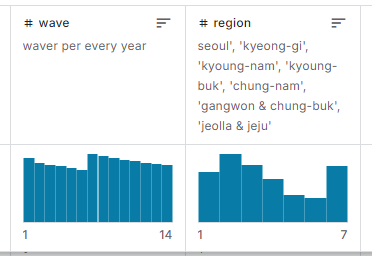

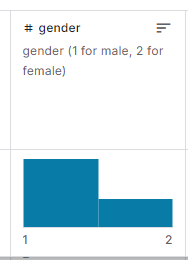

In [ ]:
del df['gender']

In [ ]:
del df['region']

In [ ]:
pd.set_option('display.max_rows', None)

#view DataFrame
df

,year,wave,income,year_born
0,2005,1,614.000000,1936
1,2011,7,896.000000,1936
2,2012,8,1310.000000,1936
3,2013,9,2208.000000,1936
4,2014,10,864.000000,1936
5,2015,11,1171.000000,1936
6,2016,12,1643.000000,1936
7,2017,13,851.000000,1936
8,2005,1,1257.000000,1945
9,2006,2,-520.062475,1945


                                 OLS Regression Results                                
Dep. Variable:                 income   R-squared (uncentered):                   0.503
Model:                            OLS   Adj. R-squared (uncentered):              0.503
Method:                 Least Squares   F-statistic:                              4153.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                        0.00
Time:                        14:09:19   Log-Likelihood:                         -39554.
No. Observations:                4100   AIC:                                  7.911e+04
Df Residuals:                    4099   BIC:                                  7.912e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

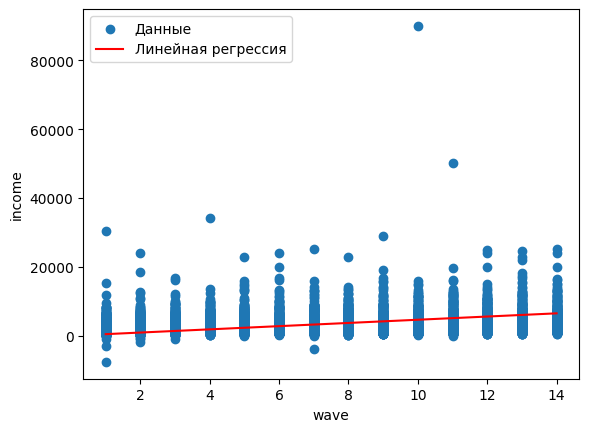

In [ ]:
#однонаправленный
Y = df['income']
X = df['wave']
model = sm.OLS(df['income'], X).fit()

# Выводим результаты
print(model.summary())

# Строим график
plt.scatter(df['wave'], df['income'], label='Данные')
plt.plot(df['wave'], model.predict(X), color='red', label='Линейная регрессия')
plt.xlabel('wave')
plt.ylabel('income')
plt.legend()
plt.show()

In [ ]:
#двунаправленный
X1 = sm.add_constant(df['wave'])
model1 = sm.OLS(df['income'], X1).fit()
print("Результаты регрессии Y ~ X:")
print(model1.summary())

# Модель 2: X зависит от Y
Y1 = sm.add_constant(df['income'])
model2 = sm.OLS(df['wave'], Y1).fit()
print("\nРезультаты регрессии X ~ Y:")
print(model2.summary())

Результаты регрессии Y ~ X:
                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           4.39e-47
Time:                        14:09:23   Log-Likelihood:                -39311.
No. Observations:                4100   AIC:                         7.863e+04
Df Residuals:                    4098   BIC:                         7.864e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2497.4651   

In [ ]:
#сквозной
import numpy as np
import statsmodels.api as sm
Y = df['income']
X = df['wave']
np.random.seed(0)
n = 100




model = sm.OLS(Y, X).fit()



# Выводим результаты
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 income   R-squared (uncentered):                   0.503
Model:                            OLS   Adj. R-squared (uncentered):              0.503
Method:                 Least Squares   F-statistic:                              4153.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                        0.00
Time:                        14:09:28   Log-Likelihood:                         -39554.
No. Observations:                4100   AIC:                                  7.911e+04
Df Residuals:                    4099   BIC:                                  7.912e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Коэффициент: 208.7027043797152
Свободный член: 2464.332245639915


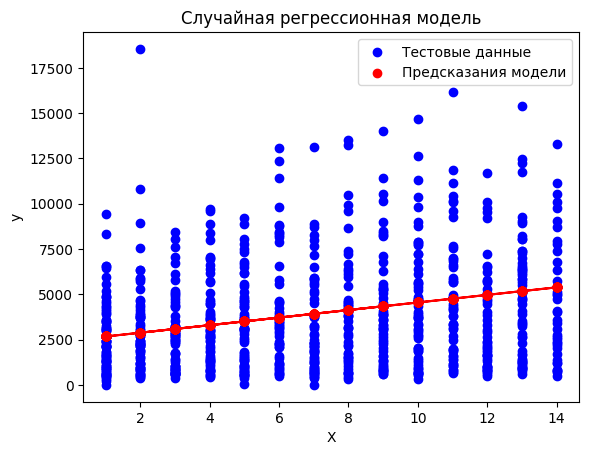

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(df[['wave']], df['income'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Вывод коэффициентов модели
print(f'Коэффициент: {model.coef_[0]}')
print(f'Свободный член: {model.intercept_}')
plt.scatter(X_test, y_test, color='blue', label='Тестовые данные')
plt.scatter(X_test, y_pred, color='red', label='Предсказания модели')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Случайная регрессионная модель')
plt.legend()
plt.show()